In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent

('2017-08-23',)

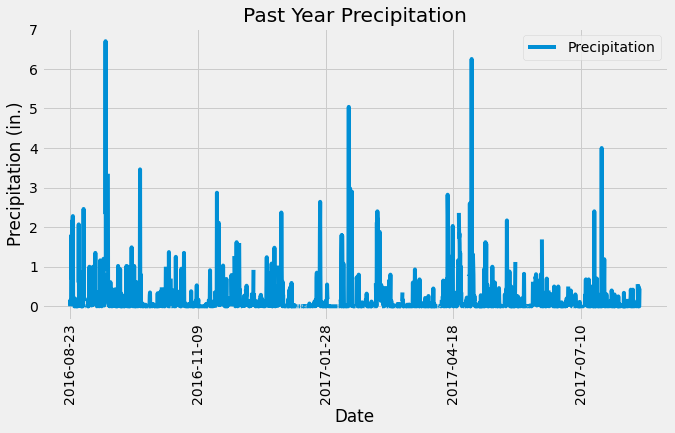

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
past_year = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date, Measurement.prcp]
past_yr_precip = session.query(*sel).filter(Measurement.date >= past_year).order_by(Measurement.date).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
past_precip = pd.DataFrame(past_yr_precip, columns = ["Date", "Precipitation"]).set_index("Date")
past_precip.head(20)

# Sort the dataframe by date 
past_precip = past_precip.sort_values(by='Date')
# Use Pandas Plotting with Matplotlib to plot the data
past_precip.plot(title="Past Year Precipitation", figsize=(10,5))
plt.legend(loc='upper right')
plt.xticks(rotation="vertical")
plt.ylabel("Precipitation (in.)")
plt.show()



In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
past_precip.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
num_stations = session.query(Station.station).count()

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_name = Measurement.station
station_actv = func.count(Measurement.station)
sel = [station_name, station_actv]

station_activity = session.query(*sel).group_by(station_name).order_by(station_actv.desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#find most active
sel = [station_name, station_actv]
most_active_station = session.query(*sel).group_by(station_name).order_by(station_actv.desc()).first()

#find temps
sel = [station_name, func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
actv_temps = session.query(*sel).filter(Measurement.date >= past_year).filter(Measurement.station == most_active_station[0]).all()
actv_temps

[('USC00519281', 59.0, 73.10795454545455, 83.0)]

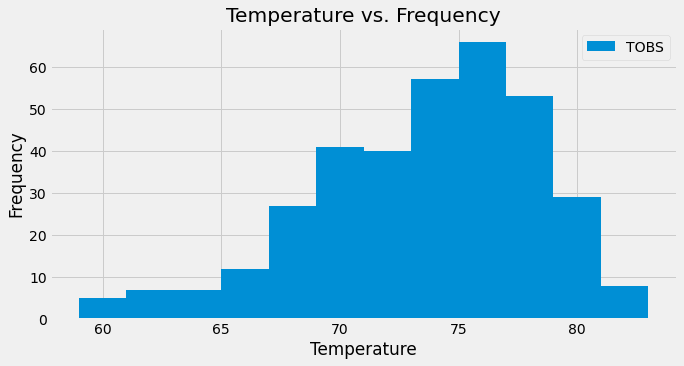

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel = [Measurement.date, Measurement.tobs]
actv_year = session.query(*sel).filter(Measurement.date >= past_year).filter(Measurement.station == most_active_station[0]).order_by(Measurement.date).all()
#turn into pd df
actv_temps = pd.DataFrame(actv_year, columns = ["Date", "TOBS"]).set_index("Date")
actv_temps["TOBS"].plot.hist(bins=12, title="Temperature vs. Frequency", figsize=(10,5))
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(loc="upper right")
plt.show()

# Close session

In [16]:
# Close Session
session.close()